* 오차역전파법 Backpropagation : 오차를 역으로 전파 하는 방법 

# 5.1 계산 그래프 

계산 과정을 그래프로 나타낸 것 : Node(노드)와 Edge(에지) 로 표현

## 5.1.1 계산 그래프로 풀다 

[사과 한개] --100원--> [*2 개]  --200원-->  [**1.1 수수료] --220원-->  결제 

1. 계산 그래프를 구성한다. 
2. 그래프에서 계산을 왼쪽에서 오른쪽으로 진행한다. 

* forward propagation : 계산을 왼쪽에서 오른쪽으로 진행
* backward propagation : 계산을 오른쪽에서 왼쪽으로 진행 

## 5.1.2 국소적 계산 
국소적 : 자신과 직접 관계된 작은 범위 
<img width=50% src ='calculateGraph.png' ></img>


## 5.1.3 왜 계산 그래프?
사과 값이 조금 올랐다. 지불금액이 얼마나 증가 하는가? <br>
--> 역전파를 이용해 구할 수 있다. 

<img width=50% src ='apple.png' ></img>

> 사과 가격에 대한 지불금액의 미분 <br>
사과 가격이 1원 오르면 최종 금액은 2.2원 오르게 된다. <br>
오른쪽에서 왼쪽으로 1 -> 1.1 > 2.2 순으로 미분 값을 전달

# 5.2 Chain rule (연쇄법칙)

## 5.2.1 계산 그래프의 역전파 

신호 E 에 순전파 때의 계산의 미분을 곱한 후 다음 노드로 전달한다. <br>
f(x) 가 $x^2$ 라면 미분한 값은 2x 가 된다. 

## 5.2.2 연쇄법칙이란?
* 합성 함수 : 여러 함수로 구성된 함수 
    * 합성 함수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타냄 <br>

$z = (x+y)^2$   <br>
        =><br>
        $z = t^2$<br>
        $t = (x+y)$

각각에 대해서 편미분 하면 x 에 대한 z 의 미분 값은 = 2(x+y) 가 된다. 

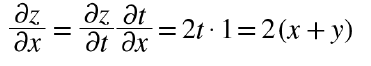

# 5.3 역전파

## 5.3.1 덧셈 노드의 역전파 

$z=x+y$ 를 미분 

덧셈 노드의 역전파는 1을 곱하기만 할뿐 입력되는 값을 그대로 다음 노드로 보냄

입력신호를 다음 노드로 출력할 뿐 그대로 다음노드로 전달함 

## 5.3.2 곱셈 노드의 역전파 

$z=xy$ 를 미분

곱셈 노드의 역전파는 상류의 값에 순전파 때의 입력 신호들을 '서로 바꾼 값' 을 곱해서 하류에 보냄

<img  width=50% src ='calculateGraphBack.png'/>

10, 5 x -> 50 이 됐으면 곱셈의 역전파에서는 

1.3 이라는 임의의 값이 역으로 흘러오면 <br>
1.3 x 5 = 6.5 다른 하나는 1.3 x 10 = 13 이 됨 (각각의 편미분 값)<br>
6.5 는 10 이 온 방향으로 <br>
13 은 5 가 온 방향으로 보내짐 


결과의 오차를 반영하기 위해 각각의 노드에 하이퍼파라메터 값을 역으로 변경시켜 나간다. 

최종 오차에 weight 가 얼마나 영향을 주는지 계산 (오차에 주는 영향을 반영해서 최종오차가 줄어들도록 함)



# 5.4 단순 계층 구현

## 5.4.1 곱셈 계층 

모든 계층이 forward() 와 backward() 라는 공통의 인터페이스를 갖도록 함 

In [2]:
class MulLayer:
    # 순전파에서 유지할 x,y 변수 초기화
    def __init__(self):
        self.x = None
        self.y = None
        
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x*y
        return out
    
    # 상류에서 넘어온 미분 (dout) 에 순전파 떄의 값을 서로 바꿔 곱한 후 하류로 흘려 보냄 
    def backward(self, dout):
        dx = dout * self.y # x 와 y 를 바꾼다. 
        dy = dout * self.x
        return dx, dy
    

곱셈 계층 순전파 역전파 구현

In [3]:
apple = 100
apple_num = 2
tax = 1.1

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

# backward
dprice = 1 
# 순전파 출력에 대한 미분 값
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dTax:", dtax)

price: 220
dApple: 2.2
dApple_num: 110
dTax: 200


## 5.4.2 덧셈 계층 

In [4]:
class AddLayer:
    def __init__(self):
        pass
    
    def forward(self, x, y):
        out = x + y
        return out

    # 상류에서 내려 오는 미분 값을 그대로 하류로 보냄 
    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy
    

덧셈 계층과 곱셈 계층으로 순전파 역전파 구현

In [5]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = MulLayer() # 사과 수량 * 개수 
mul_orange_layer = MulLayer()  # 오랜지 수량 * 개수 
add_apple_orange_layer = AddLayer() # 사과가격 + 오랜지가격 
mul_tax_layer = MulLayer() # 총 가격 * 수수료 

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)  # (1)
orange_price = mul_orange_layer.forward(orange, orange_num)  # (2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)  # (3)
price = mul_tax_layer.forward(all_price, tax)  # (4)

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)  # (4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)  # (3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)  # (2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)  # (1)


print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dOrange:", dorange)
print("dOrange_num:", int(dorange_num))
print("dTax:", dtax)


price: 715
dApple: 2.2
dApple_num: 110
dOrange: 3.3000000000000003
dOrange_num: 165
dTax: 650


# 5.5 활성화 함수 계층 구현하기 

## 5.5.1 ReLU 계층

y = x (x>0) <br>
y = 0 (x<=0)

x 에 대한 미분 

$\frac{dy}{dx}$ = 1 (x>0) <br>
$\frac{dy}{dx}$ = 0 (x<=0)


In [5]:
class Relu:
    def __init__(self):
        sef.mask = None
        
    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        
        return out
    
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        
        return dx
    

mask : True/False 로 구성된 넘파일 배열로 <br>
    순전파의 입력인 x 의 원소값이 0 이하인 인덱스는 True 그외에는 False 

In [7]:
import numpy as np
x = np.array([[1.0, -0.5], [-2.0, 3.0]])
print(x)
mask = (x<=0)
print(mask)

[[ 1.  -0.5]
 [-2.   3. ]]
[[False  True]
 [ True False]]


## 5.2.2 Sigmoid 계층 

$\frac{1}{1+\exp(-x)}$ 


In [8]:
class Sigmoid:
    def __init__(self):
        self.out = None
        
    def forward(self, x):
        out = 1 / (1 + np.exp(-1))
        self.out = out
        
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        
        return dx
    

순전파의 출력을 인스턴스 변수 out 에 보관했다, 역전파 때 그 변수를 사용 

# 5.6 Affine/Softmax 계층 구현

## 5.6.1 Affine 계층 

== Fully Connected

Y = np.dot(X,W) +B 로 계산 

X(2,) * W(2,3) = O(3,) 의 차원의 원소 개수를 일치 시켜야 함<br>
(신경망의 순전파 때 수행하는 행렬의 내적 = 어파인 변환(Affine transformaton))

$X \cdot W = \frac{\partial L}{\partial Y}$ 이기때문에

$\frac{\partial L}{\partial X} = \frac{\partial L}{\partial Y}\cdot {W}^{t}$ <br>
$\frac{\partial L}{\partial W} =  {X}^{t}\cdot\frac{\partial L}{\partial Y}$

역전파로 $\frac{\partial L}{\partial X}$ 값과 $\frac{\partial L}{\partial W}$ 값을 구함 

편향을 더할때에도 각각의 N 개의 데이터 모두에게 적용
 

In [11]:
x_dot_w = np.array([[0,0,0], [10,10,10]])
B = np.array([1,2,3])

print(x_dot_w + B)

[[ 1  2  3]
 [11 12 13]]


편향의 역전파는 N 개의 데이텅 대한 미분을 데이터 마다 더해서 구함.<br>
np.sum() 에서 0 번째 축(데이터를 단위로 한 축)에 대해서 총합을 구함.

In [12]:
dY = np.array([[1,2,3], [4,5,6]]) # 데이터 2개 
dB = np.sum(dY, axis = 0)
dB

array([5, 7, 9])

In [13]:

class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        
        self.x = None
        
        # 가중치와 편향 매개변수의 미분
        self.dW = None
        self.db = None
        
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        return dx

## 5.6.3 Softmax-with-Loss 계층

softmax : 입력 값을 정규화하여 출력 

신경망이 수행하는 작업 : 학습, 추론<br> 
    추론에서 주로 max 값을 사용<br>
    학습에서 주로 softmax 값을 사용 
    
손실 함수인 교차 엔트로피 오차도 포함 = softmax-with-loss

- 3 클래스 분류를 가정하고 이전 계층의 입력(점수)를 받아 softmax 계층은 (a1, a2, a3) 를 정규화 하여 (y1, y2, y3) 를 출력 
- Cross Entropy Error 계층은 softmax 출력과 정답을 받고 손실을 L 을 출력
- softmax 계층의 역전파는 (y1-t1, y2-t2, y3-t3) 오차가 앞계층에 전해짐 

예) 정답이 (0, 1, 0)  일때 softmax 에서 (0.3, 0.2, 0.5) 를 출력 했을 때 <br>
정답인 1번 인덱스 는 확률이 0.2(20%) 라서 softmaxk 의 역전파는 (0.3, -0.8, 0.5) 가 되어 커다란 오차를 전파 하게 됨 


In [15]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))


def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

In [16]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None # 손실
        self.y = None #softmax 출력
        self.t = None
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(t)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        
        return dx

# 5.7 오차역전파법 구현하기


## 5.7.1 신경망 학습의 전체 그림 

* 전체 
    - 가중치와 편향을 훈련 데이터에 적응하도록 저정하는 과정 (학습) 을 진행
* 1단계 - 미니배치
    - 훈련 데이터 중 일부를 가져와 손실 함수 값을 줄이는 것이 목표
* 2단계 - 기울기 산출 
    - 각 가중치 매개변수의 기울기를 구해 손실 함수의 값을 가장 작게 하는 방향을 제시 
* 3단계 - 매개변수 갱신
    - 가중치 매개변수를 기울기 방향으로 조금 갱신
* 4단계 - 반복

기울기 산출 에서 오차역전파법 사용 

수치 미분은 구현하기 쉽지만 계산이 올래 걸리나 오차역전파법은 기울기를 효율적이고 빠르게 구할 수 있음 

## 5.7.2 오차역전파법을 이용한 신경망 구현

lastLayer : 신경망의 마지막 계층 Softmax With Loss 계층 이용


In [18]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict() # 순서가 있는 dictionary
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads


## 5.7.3 오차역전파법으로 구한 기울기 검증

오차역전파의 복잡한 구현에 실수를 찾기 위해<br> 
수치미분을 사용하여 정확히 구현했는지 확인

gradient check 기울기 확인 (두 기울기 구하는 방법을 비교) 

In [20]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
#from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

# 각 가중치의 절대 오차의 평균을 구한다.
for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))


W1:1.41856751671e-06
b1:1.52452317963e-05
W2:6.8434419004e-13
b2:1.19904090823e-10


## 오차역전파법을 사용한 학습 구현 

In [21]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)

import numpy as np
from dataset.mnist import load_mnist
#from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)


0.113083333333 0.1139
0.90485 0.9051
0.920133333333 0.9212
0.93645 0.9371
0.94565 0.9451
0.9521 0.9494
0.956683333333 0.9541
0.961383333333 0.9586
0.96565 0.962
0.96645 0.9631
0.970783333333 0.9662
0.972383333333 0.9666
0.974366666667 0.9687
0.976816666667 0.9686
0.976183333333 0.9688
0.978216666667 0.9712
0.979233333333 0.9728
